# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 606


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [25]:
# Test run to identify variables of interest & their location 
url = "http://api.openweathermap.org/data/2.5/weather?"
city = "London"

city_url = url + "appid=" + weather_api_key + "&q=" + city

response = requests.get(city_url).json()
print(json.dumps(response, indent=4, sort_keys=True))

{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 51.5085,
        "lon": -0.1257
    },
    "dt": 1698694411,
    "id": 2643743,
    "main": {
        "feels_like": 282.22,
        "humidity": 90,
        "pressure": 997,
        "temp": 283.09,
        "temp_max": 284.13,
        "temp_min": 281.14
    },
    "name": "London",
    "sys": {
        "country": "GB",
        "id": 2006068,
        "sunrise": 1698648577,
        "sunset": 1698683914,
        "type": 2
    },
    "timezone": 0,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 220,
        "speed": 2.06
    }
}


In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = 'metric'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&units=" + units + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port-aux-francais
Processing Record 2 of Set 1 | kuanda
Processing Record 3 of Set 1 | tura
Processing Record 4 of Set 1 | edinburgh of the seven seas
Processing Record 5 of Set 1 | stanley
Processing Record 6 of Set 1 | bethel
Processing Record 7 of Set 1 | west island
Processing Record 8 of Set 1 | yellowknife
Processing Record 9 of Set 1 | aasiaat
Processing Record 10 of Set 1 | talcahuano
Processing Record 11 of Set 1 | hamilton
Processing Record 12 of Set 1 | hoemul-li
Processing Record 13 of Set 1 | karkira
Processing Record 14 of Set 1 | waitangi
Processing Record 15 of Set 1 | muroto-misakicho
Processing Record 16 of Set 1 | thompson
Processing Record 17 of Set 1 | afaahiti
Processing Record 18 of Set 1 | papatowai
Processing Record 19 of Set 1 | santiago de cao
Processing Record 20 of Set 1 | cabo san lucas
Processing Record 21 of Set 1 | adamstown
Processing Record 22 of Set 1 | antsira

City not found. Skipping...
Processing Record 41 of Set 4 | ajdabiya
Processing Record 42 of Set 4 | guiuan
Processing Record 43 of Set 4 | santa cruz
Processing Record 44 of Set 4 | the pas
Processing Record 45 of Set 4 | saldanha
Processing Record 46 of Set 4 | arkhangel'sk
Processing Record 47 of Set 4 | greenwood
Processing Record 48 of Set 4 | chernyshevskiy
Processing Record 49 of Set 4 | ytyk-kyuyel'
City not found. Skipping...
Processing Record 0 of Set 5 | kagal'nitskaya
Processing Record 1 of Set 5 | dadonghai
City not found. Skipping...
Processing Record 2 of Set 5 | dame-marie
Processing Record 3 of Set 5 | jamestown
Processing Record 4 of Set 5 | sanctuary point
Processing Record 5 of Set 5 | heishan
Processing Record 6 of Set 5 | rongelap
Processing Record 7 of Set 5 | west end
Processing Record 8 of Set 5 | berezovyy
Processing Record 9 of Set 5 | lucapa
Processing Record 10 of Set 5 | isafjordur
Processing Record 11 of Set 5 | navirai
Processing Record 12 of Set 5 | hit

Processing Record 32 of Set 8 | flying fish cove
Processing Record 33 of Set 8 | lubango
Processing Record 34 of Set 8 | tindouf
Processing Record 35 of Set 8 | zuni pueblo
Processing Record 36 of Set 8 | ola
Processing Record 37 of Set 8 | jimenez
Processing Record 38 of Set 8 | gilgit
Processing Record 39 of Set 8 | kibaya
Processing Record 40 of Set 8 | caleta de carquin
Processing Record 41 of Set 8 | machico
Processing Record 42 of Set 8 | ironwood
Processing Record 43 of Set 8 | fortuna
Processing Record 44 of Set 8 | valparaiso
Processing Record 45 of Set 8 | burnie
Processing Record 46 of Set 8 | betare oya
Processing Record 47 of Set 8 | cozumel
Processing Record 48 of Set 8 | isla mujeres
Processing Record 49 of Set 8 | akdepe
Processing Record 0 of Set 9 | brotton
Processing Record 1 of Set 9 | solwezi
Processing Record 2 of Set 9 | weno
Processing Record 3 of Set 9 | sao miguel do araguaia
Processing Record 4 of Set 9 | yaren
Processing Record 5 of Set 9 | lejanias
Processi

Processing Record 18 of Set 12 | menongue
Processing Record 19 of Set 12 | troitsko-pechorsk
Processing Record 20 of Set 12 | nadym
Processing Record 21 of Set 12 | lakatoro
Processing Record 22 of Set 12 | san antonio del estrecho
City not found. Skipping...
Processing Record 23 of Set 12 | barvinkove
Processing Record 24 of Set 12 | yinzhu
Processing Record 25 of Set 12 | minab
Processing Record 26 of Set 12 | vilhena
Processing Record 27 of Set 12 | paraiso
Processing Record 28 of Set 12 | rouached
Processing Record 29 of Set 12 | punta del este
Processing Record 30 of Set 12 | bondoukou
Processing Record 31 of Set 12 | madalena
Processing Record 32 of Set 12 | batang berjuntai
Processing Record 33 of Set 12 | monterey
Processing Record 34 of Set 12 | eirunepe
Processing Record 35 of Set 12 | harstad
Processing Record 36 of Set 12 | okhotsk
Processing Record 37 of Set 12 | crescent city
Processing Record 38 of Set 12 | turabah
Processing Record 39 of Set 12 | woolgoolga
Processing R

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          576
Lat           576
Lng           576
Max Temp      576
Humidity      576
Cloudiness    576
Wind Speed    576
Country       576
Date          576
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,2.83,78,100,15.49,TF,1698693503
1,kuanda,56.3161,116.0806,-10.78,51,12,0.21,RU,1698693503
2,tura,25.5198,90.2201,20.18,87,100,1.52,IN,1698693504
3,edinburgh of the seven seas,-37.0676,-12.3116,12.09,90,100,14.09,SH,1698693504
4,stanley,54.8680,-1.6985,6.77,93,75,3.09,GB,1698693504


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,2.83,78,100,15.49,TF,1698693503
1,kuanda,56.3161,116.0806,-10.78,51,12,0.21,RU,1698693503
2,tura,25.5198,90.2201,20.18,87,100,1.52,IN,1698693504
3,edinburgh of the seven seas,-37.0676,-12.3116,12.09,90,100,14.09,SH,1698693504
4,stanley,54.8680,-1.6985,6.77,93,75,3.09,GB,1698693504


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

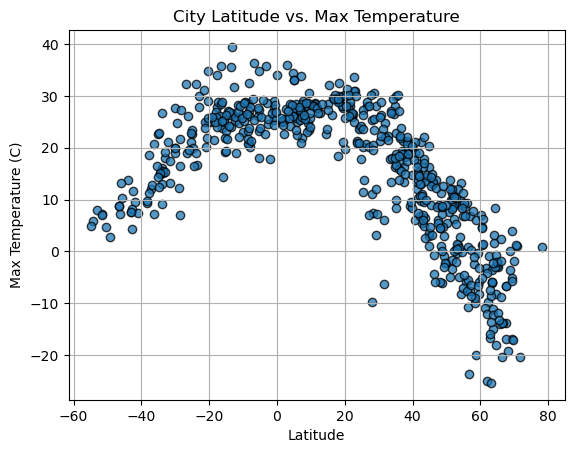

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'], edgecolors='black', alpha=.75)

# Incorporate the other graph properties
plt.title('City Latitude vs. Max Temperature')
plt.ylabel('Max Temperature (C)')
plt.xlabel('Latitude')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

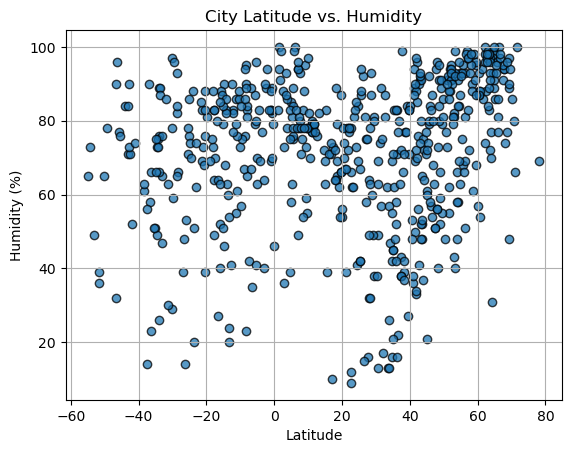

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'],city_data_df['Humidity'],edgecolors='black', alpha=.75)

# Incorporate the other graph properties
plt.title('City Latitude vs. Humidity')
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

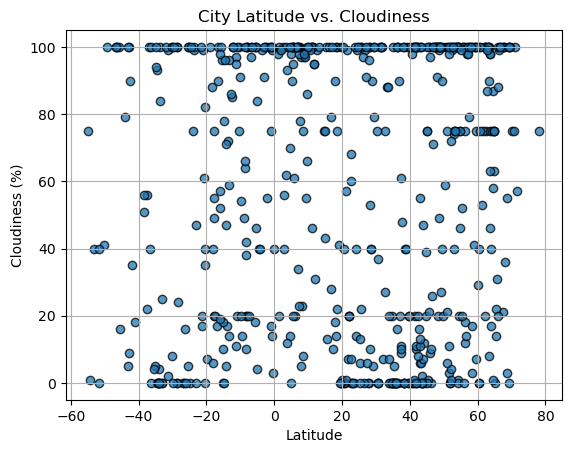

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'],city_data_df['Cloudiness'],edgecolors='black', alpha=.75)

# Incorporate the other graph properties
plt.title('City Latitude vs. Cloudiness')
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

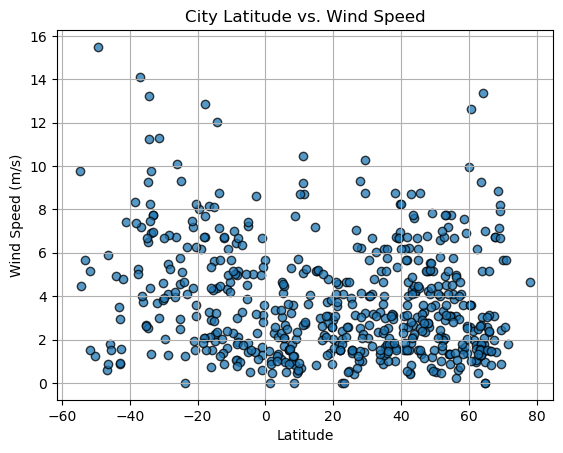

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'],city_data_df['Wind Speed'],edgecolors='black', alpha=.75)

# Incorporate the other graph properties
plt.title('City Latitude vs. Wind Speed')
plt.ylabel('Wind Speed (m/s)')
plt.xlabel('Latitude')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
city_data_df.dtypes
northern_hemi_df = city_data_df.query('Lat>=0')

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,kuanda,56.3161,116.0806,-10.78,51,12,0.21,RU,1698693503
2,tura,25.5198,90.2201,20.18,87,100,1.52,IN,1698693504
4,stanley,54.8680,-1.6985,6.77,93,75,3.09,GB,1698693504
5,bethel,41.3712,-73.4140,13.30,89,100,1.54,US,1698693334
7,yellowknife,62.4560,-114.3525,-0.88,88,75,6.17,CA,1698693505


In [13]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.query('Lat<0')

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,2.83,78,100,15.49,TF,1698693503
3,edinburgh of the seven seas,-37.0676,-12.3116,12.09,90,100,14.09,SH,1698693504
6,west island,-12.1568,96.8225,25.99,83,100,6.69,CC,1698693504
9,talcahuano,-36.7167,-73.1167,12.82,58,40,7.20,CL,1698693505
13,waitangi,-43.9535,-176.5597,13.79,84,79,4.92,NZ,1698693506


###  Temperature vs. Latitude Linear Regression Plot

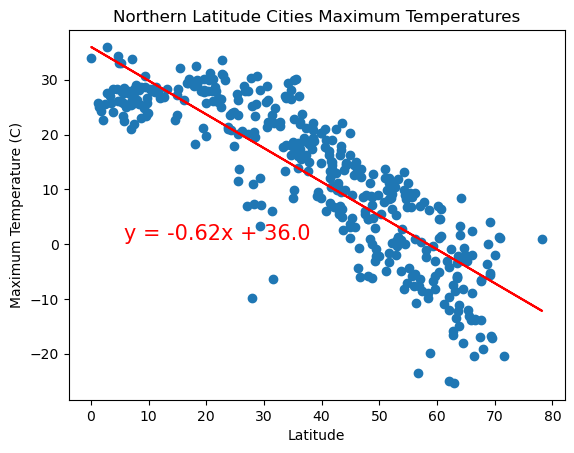

The r-value is -0.86.


In [14]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])
# line equation
regress_values = northern_hemi_df['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Build the scatter plots for latitude vs. wind speed
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Max Temp'])

# Incorporate the other graph properties
plt.title('Northern Latitude Cities Maximum Temperatures')
plt.ylabel('Maximum Temperature (C)')
plt.xlabel('Latitude')

plt.plot(northern_hemi_df['Lat'],regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")

# Show plot
plt.show()
print(f"The r-value is {round(rvalue,2)}.")

The r-value is -0.88.


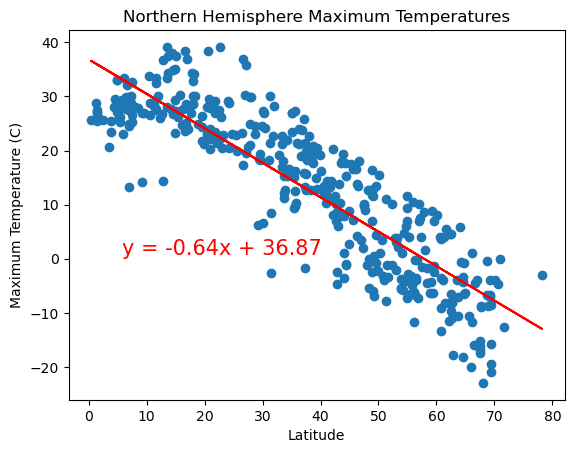

In [18]:
# Linear regression on Northern Hemisphere

# Pull values and write equations
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])
regress_values = northern_hemi_df['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Build the scatter plot
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Max Temp'])

# Incorporate the other graph properties
plt.title('Northern Hemisphere Maximum Temperatures')
plt.ylabel('Maximum Temperature (C)')
plt.xlabel('Latitude')

# Add regression line annotations
plt.plot(northern_hemi_df['Lat'],regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")

# Show plot
print(f"The r-value is {round(rvalue,2)}.")
plt.show()


The r-value is 0.77.


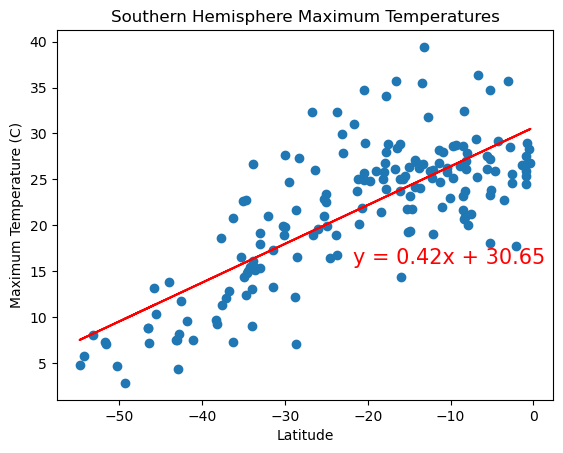

In [15]:
# Linear regression on Southern Hemisphere

# Pull values and write equations
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])
regress_values = southern_hemi_df['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Build the scatter plot
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Max Temp'])

# Incorporate the other graph properties
plt.title('Southern Hemisphere Maximum Temperatures')
plt.ylabel('Maximum Temperature (C)')
plt.xlabel('Latitude')

# Add regression line annotations
plt.plot(southern_hemi_df['Lat'],regress_values,"r-")
plt.annotate(line_eq,(-21.8,15.8),fontsize=15,color="red")

# Show plot
print(f"The r-value is {round(rvalue,2)}.")
plt.show()

**Discussion about the linear relationship:** The r-value for the relationship between temperature and latitude in the Northern Hemisphere is -0.88, indicating a relatively strong negative relationship. This would mean that the further from the equator you are in terms of latitude, the lower the maximum temperature. Although the relationship is the opposite in the Southern Hemisphere, with an r-value of 0.77, the idea is the same. Cities near the equator in both datasets have higher maximum temperatures. Both of these r-values are close to 1, meaning the correlation is strong, but not perfect.

### Humidity vs. Latitude Linear Regression Plot

The r-value is 0.21.


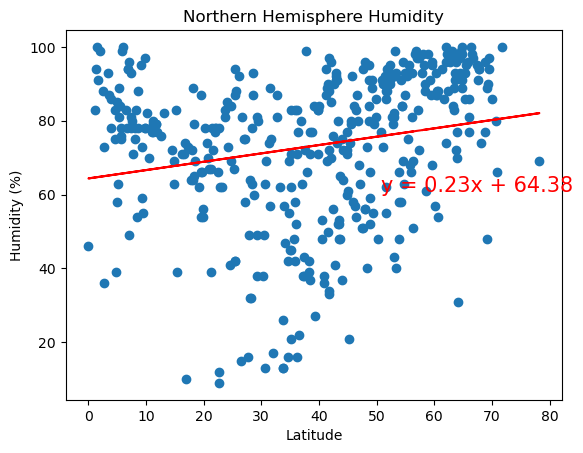

In [19]:
# Northern Hemisphere

# Pull values and write equations
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])
regress_values = northern_hemi_df['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Build the scatter plot
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Humidity'])

# Incorporate the other graph properties
plt.title('Northern Hemisphere Humidity')
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')

# Add regression line annotations
plt.plot(northern_hemi_df['Lat'],regress_values,"r-")
plt.annotate(line_eq,(50.8,60.8),fontsize=15,color="red")

# Show plot
print(f"The r-value is {round(rvalue,2)}.")
plt.show()

The r-value is 0.18.


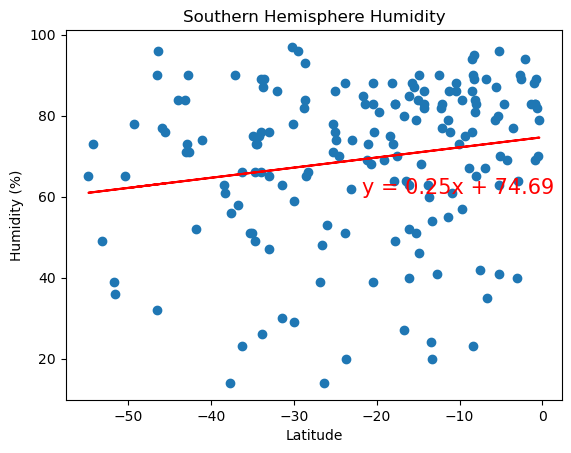

In [20]:
# Southern Hemisphere

# Pull values and write equations
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])
regress_values = southern_hemi_df['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Build the scatter plot
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Humidity'])

# Incorporate the other graph properties
plt.title('Southern Hemisphere Humidity')
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')

# Add regression line annotations
plt.plot(southern_hemi_df['Lat'],regress_values,"r-")
plt.annotate(line_eq,(-21.8,60.8),fontsize=15,color="red")

# Show plot
print(f"The r-value is {round(rvalue,2)}.")
plt.show()

**Discussion about the linear relationship:** The r-values of 0.21 and 0.18 in the Northern and Southern Hemispheres respectively indicate a weak relationship between latitude and humidity, and a positive relationship means that higher latitude is correlated with higher humidity. However, in the Northern Hemisphere this means that the most North latitude measured has a higher humidity than the equator. In the South, the southern most latitudes have lower humidity than the equator. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is 0.02.


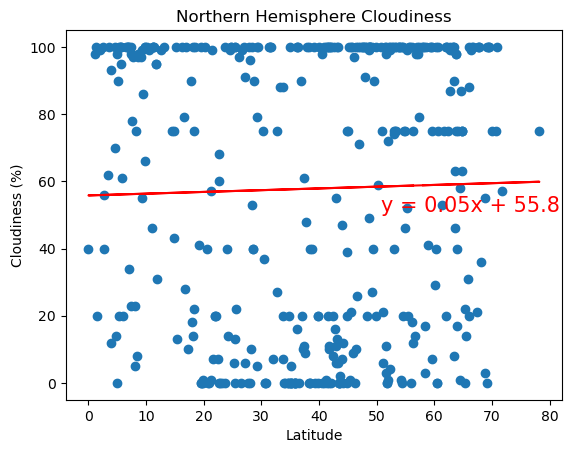

In [21]:
# Northern Hemisphere

# Pull values and write equations
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])
regress_values = northern_hemi_df['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Build the scatter plot
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Cloudiness'])

# Incorporate the other graph properties
plt.title('Northern Hemisphere Cloudiness')
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')

# Add regression line annotations
plt.plot(northern_hemi_df['Lat'],regress_values,"r-")
plt.annotate(line_eq,(50.8,50.8),fontsize=15,color="red")

# Show plot
print(f"The r-value is {round(rvalue,2)}.")
plt.show()

The r-value is 0.16.


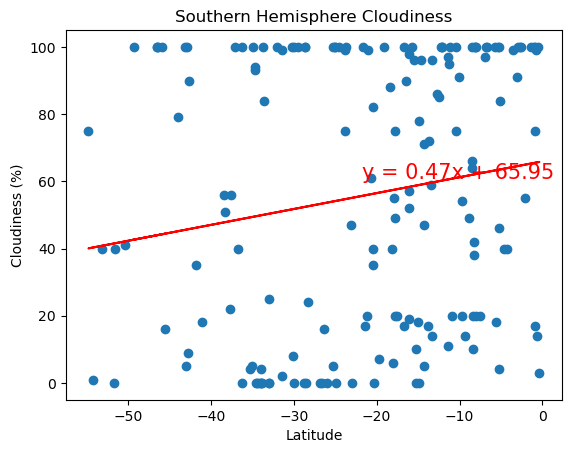

In [22]:
# Southern Hemisphere

# Pull values and write equations
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'])
regress_values = southern_hemi_df['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Build the scatter plot
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Cloudiness'])

# Incorporate the other graph properties
plt.title('Southern Hemisphere Cloudiness')
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')

# Add regression line annotations
plt.plot(southern_hemi_df['Lat'],regress_values,"r-")
plt.annotate(line_eq,(-21.8,60.8),fontsize=15,color="red")

# Show plot
print(f"The r-value is {round(rvalue,2)}.")
plt.show()

**Discussion about the linear relationship:** In the Northern Hemisphere, the r-value of 0.02 shows almost no correlation between latitude and cloudiness, and in the South the r-value of 0.16 indicates a very weak positive relationship. In both cases, though, the graphs support the weak or non-existant correlation due to the spread out points that are not as clustered around the regression line as those in the Maximum Temperature graphs. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is 0.12.


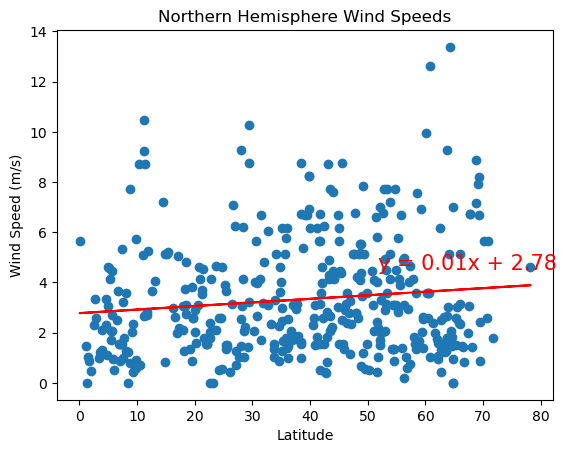

In [23]:
# Northern Hemisphere

# Pull values and write equations
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'])
regress_values = northern_hemi_df['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Build the scatter plot
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Wind Speed'])

# Incorporate the other graph properties
plt.title('Northern Hemisphere Wind Speeds')
plt.ylabel('Wind Speed (m/s)')
plt.xlabel('Latitude')

# Add regression line annotations
plt.plot(northern_hemi_df['Lat'],regress_values,"r-")
plt.annotate(line_eq,(51.8,4.5),fontsize=15,color="red")

# Show plot
print(f"The r-value is {round(rvalue,2)}.")
plt.show()

The r-value is -0.2.


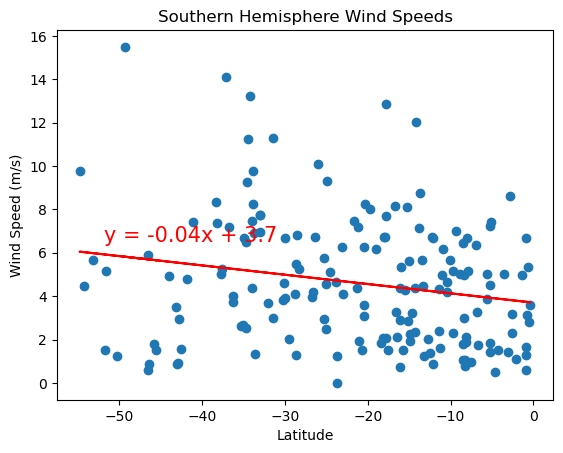

In [24]:
# Southern Hemisphere

# Pull values and write equations
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'])
regress_values = southern_hemi_df['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Build the scatter plot
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Wind Speed'])

# Incorporate the other graph properties
plt.title('Southern Hemisphere Wind Speeds')
plt.ylabel('Wind Speed (m/s)')
plt.xlabel('Latitude')

# Add regression line annotations
plt.plot(southern_hemi_df['Lat'],regress_values,"r-")
plt.annotate(line_eq,(-51.8,6.5),fontsize=15,color="red")

# Show plot
print(f"The r-value is {round(rvalue,2)}.")
plt.show()

**Discussion about the linear relationship:** The r-values of 0.12 and -0.2 again indicate very weak, almost non-existant correlation between wind speed and latitude. In this case, the Southern Hemisphere data does show a slight negative relationship, and the Northern data shows a slight positive relationship. Although the r-values are very close to 1, and the correlation is very weak, this may indicate that the equator sees slower wind speeds than the higher latitudes in either direction.